# Data  Cleaning Notebook
__This notebook handles all preprocessing steps required to prepare our churn dataset for analysis and modeling.__

**Objectives:**
- Handle data bugs and ambiguity
- Clean and standardize categorical values
- Handle missing or inconsistent data
- Rename poorly labeled columns for clarity
- Detect and fix duplicates or outliers
- Prepare data for encoding and scaling

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

__creating a copy of the original dataset__

In [258]:
churn_df = pd.read_excel("../data/raw/E Commerce Dataset.xlsx", sheet_name="E Comm")
churn_df_copy = churn_df.copy()

In [259]:
churn_df_copy.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [260]:
churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Renaming Columns
We want to rename a column while still keepimg the same naming convention

In [261]:
churn_df_copy.rename(columns={
    "PreferedOrderCat" : "PreferredOrderCat"
}, inplace=True)
# churn_df_copy.head()

<hr/>

### Standardizing Value Naming in Categorical Columns

We can rename column categories as one category to have a standard naming type. Cases like these may require extra upstream clearification

In [262]:
# Preferred Login Device
churn_df_copy = churn_df_copy.replace({
    'PreferredLoginDevice': {'Mobile Phone': 'Phone'}
})

# Preffered Payment Mode
churn_df_copy = churn_df_copy.replace({
    "PreferredPaymentMode" : {
        "CC" : "Credit Card",
        "COD" : "Cash on Delivery",
        "UPI" : "Unified Payments Interface"
        }
})

# Preferred Order Category
churn_df_copy = churn_df_copy.replace({
    'PreferredOrderCat': {'Mobile': 'Mobile Phone'}
})

# churn_df_copy["PreferredPaymentMode"].value_counts()

<hr/>

## <u>HANDLING MISSING VALUES</u>

__Now, we will inspect the dataset for missing values and decide how best to tackle it__

In [263]:
churn_df_copy.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2323,52324,0,13.0,Phone,1,8.0,Credit Card,Female,2.0,1,Laptop & Accessory,3,Married,6,0,20.0,6.0,11.0,8.0,163.77
3045,53046,0,1.0,Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,18.0,3.0,8.0,8.0,177.96
2671,52672,1,0.0,Phone,3,8.0,E wallet,Male,2.0,4,Laptop & Accessory,4,Single,8,1,12.0,1.0,2.0,2.0,199.07
2150,52151,0,18.0,Computer,3,15.0,Debit Card,Female,3.0,4,Laptop & Accessory,3,Married,2,0,13.0,4.0,4.0,12.0,155.93
4508,54509,0,16.0,Phone,1,30.0,Debit Card,Female,3.0,4,Grocery,1,Single,4,0,15.0,NaN,2.0,1.0,284.92


In [264]:
# The number of values missing in each of our columns
churn_df_copy.isna().sum().sort_values(ascending=False)


DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferredOrderCat                0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

__In a real setting, it would be best to ask (e.g the data provider, data engineer, manager) why these values are missing or what 'missing' means for each of these columns<br/>__
__We will also be referencing the plot from the explanatory_analysis.ipynb notebook to understand the distribution of numerical columns__

<hr/>

### <u>Days Since Last Order (`DaySinceLastOrder`)</u>
__The number of days that have passed since a customer made their most recent purchase__

<li>We are going to create a new feature from the missing values. NaN <b>could mean that the customer has never actually placed an order</b></li> 
<li>We'll change the column values from decimal to integer</li> 
<li>A large or negative number can skew the data or confuse machine learning models later on in the project</li>


In [265]:
churn_df_copy["DaySinceLastOrder"].max()    # Maximum number of days a customer hasn't ordered is 46


# Median to fill missing values
median = churn_df_copy["DaySinceLastOrder"].median()    # Median value is 3
churn_df_copy.fillna({"DaySinceLastOrder": median}, inplace=True)


# Converting `DaySinceLastOrder` column to an integer
churn_df_copy['DaySinceLastOrder'] = churn_df_copy['DaySinceLastOrder'].astype(int)

churn_df_copy["DaySinceLastOrder"].isna().any()     # False
churn_df_copy.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2471,52472,0,23.0,Phone,3,15.0,E wallet,Male,2.0,3,Others,3,Married,5,1,NaN,0.0,1.0,0,293.31
3750,53751,1,1.0,Computer,1,16.0,Credit Card,Male,3.0,4,Mobile Phone,5,Single,4,1,12.0,1.0,2.0,1,156.72
1638,51639,1,0.0,Phone,3,10.0,E wallet,Male,2.0,4,Laptop & Accessory,1,Single,2,1,12.0,4.0,7.0,4,158.28
388,50389,1,0.0,Phone,1,16.0,Credit Card,Male,2.0,3,Mobile Phone,3,Single,2,1,11.0,0.0,1.0,1,110.09
1298,51299,0,0.0,Phone,1,6.0,Debit Card,Male,3.0,3,Mobile Phone,3,Single,1,0,12.0,0.0,1.0,2,133.75


<p>We won't be adding a new feature, the dataset shows that some values that were missing actually used coupons and had orders. The missing values may a data entry issue</P>
<p>For the sake of this project, we will be imputing missing vallues with the median. More context would be needed to know how best to handle this</p>


<hr/>

### <u>Order Amount Hike From Last Year (`OrderAmountHikeFromlastYear`)</u>
__The percentage increase (or change) in the total amount a customer spent this year compared to the previous year__

If the missing values is due to new customers, we could create a feature that flags such customers. It would help to get additional data from the data source if possible

**Missing values could mean:**
+ No order history last year
+ A data issue
+ A user who's new to the platform


<p>Some of these missing values are from customers who placed orders recently and received cashback</p>

In [266]:
churn_df_copy.rename(columns={
    "OrderAmountHikeFromlastYear" : "OrderAmountHikeFromlastYear(%)"
}, inplace=True)

# Better view of how missing values in OrderAmountHikeFromlastYear(%) coolumn relates with others
churn_df_copy[[
    "Tenure","DaySinceLastOrder","OrderCount",
    "CashbackAmount", "OrderAmountHikeFromlastYear(%)"]][churn_df_copy["OrderAmountHikeFromlastYear(%)"].isna()].query("Tenure > 11")

,Tenure,DaySinceLastOrder,OrderCount,CashbackAmount,OrderAmountHikeFromlastYear(%)
40,23.0,4,4.0,299.26,NaN
65,25.0,9,11.0,299.99,NaN
106,15.0,15,11.0,292.32,NaN
108,23.0,6,1.0,295.17,NaN
119,18.0,7,1.0,292.02,NaN
...,...,...,...,...,...
5534,61.0,1,2.0,303.75,NaN
5537,23.0,4,5.0,316.61,NaN
5561,29.0,5,2.0,321.36,NaN
5597,13.0,4,2.0,319.31,NaN


In [267]:
print(f"max % hike from a customer is {churn_df_copy["OrderAmountHikeFromlastYear(%)"].max()}")
median = churn_df_copy["OrderAmountHikeFromlastYear(%)"].median()    # Median value is 15%
churn_df_copy.fillna({"OrderAmountHikeFromlastYear(%)": median}, inplace=True)

max % hike from a customer is 26.0


Out of __265__ rows with missing values, __253__ of them have been around for at least a year. 

This indicates the missingness is **not due to new customers**, but likely due to **data or recording errors**.

To maintain its distribution integrity, we imputed these missing values with the **median** of the non-missing data.

In [268]:
# The number of values missing in each of our columns out of 5630 entries
churn_df_copy.isna().sum().sort_values(ascending=False)

Tenure                            264
OrderCount                        258
CouponUsed                        256
HourSpendOnApp                    255
WarehouseToHome                   251
CustomerID                          0
MaritalStatus                       0
DaySinceLastOrder                   0
OrderAmountHikeFromlastYear(%)      0
Complain                            0
NumberOfAddress                     0
PreferredOrderCat                   0
SatisfactionScore                   0
Churn                               0
NumberOfDeviceRegistered            0
Gender                              0
PreferredPaymentMode                0
CityTier                            0
PreferredLoginDevice                0
CashbackAmount                      0
dtype: int64

<hr/>

### <u>Tenure</u>
+ `Tenure` column ranges from 0 - 61, the data dictionary doesn't make it clear if its values are in months or in days
+ We will take that tenure is in months as it is the typical standard for ecommerce data and according to the data dictionary, many other column values are measured in months as well

In [269]:
churn_df_copy.rename(columns={
    "Tenure" : "Tenure(months)"
}, inplace=True)

In [270]:
churn_df_copy.corr(numeric_only=True)["Tenure(months)"]

CustomerID                        0.029952
Churn                            -0.349408
Tenure(months)                    1.000000
CityTier                         -0.060688
WarehouseToHome                  -0.018218
HourSpendOnApp                   -0.021226
NumberOfDeviceRegistered         -0.023983
SatisfactionScore                -0.013903
NumberOfAddress                   0.237666
Complain                         -0.021268
OrderAmountHikeFromlastYear(%)   -0.006693
CouponUsed                        0.129035
OrderCount                        0.186403
DaySinceLastOrder                 0.173696
CashbackAmount                    0.476380
Name: Tenure(months), dtype: float64

Tenure is likely in months because it also has a weak correlation with the `DaySinceLastOrder` column. If it were in days, there would be a stronger correlation between the two.

In [271]:
missing_tenure = churn_df_copy[["Tenure(months)", "CashbackAmount", "OrderCount", "OrderAmountHikeFromlastYear(%)"]][churn_df_copy["Tenure(months)"].isna()]
missing_tenure.isna().sum()

Tenure(months)                    264
CashbackAmount                      0
OrderCount                          0
OrderAmountHikeFromlastYear(%)      0
dtype: int64


+ Missing values in `Tenure` column have corrsponding values in other columns that indicate customer activity within a month so this is not a case of missing tenure due to new users
+ Missingness in this case is random; we will input the missing values with the average customer tenure for all our customers

<Axes: >

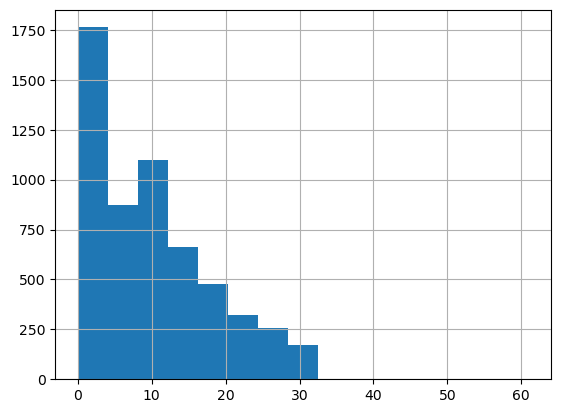

In [272]:
median = churn_df_copy["Tenure(months)"].median()    # Median value is 9
churn_df_copy.fillna({"Tenure(months)": median}, inplace=True)

churn_df_copy['Tenure(months)'].hist(bins=15)

Most of our customers stay from 0-10 months (would be more unrealistic if tenure was measured in days)

<hr/>

### <u>WarehouseToHome</u>
+ This column has 251 missing values. Since this is a location-based profile feature (likely in kilometers), we assumed the missingness was due to incomplete address records. We imputed with the median to preserve its distribution without skewing the data or outliers.


<Axes: >

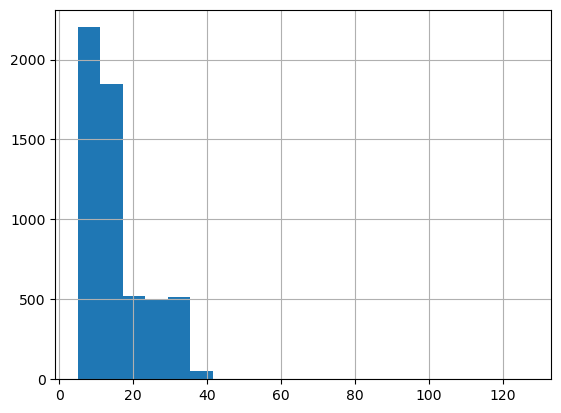

In [273]:
median = churn_df_copy["WarehouseToHome"].median()    # Median value is 14.0 (km)
churn_df_copy.fillna({"WarehouseToHome": median}, inplace=True)

churn_df_copy["WarehouseToHome"].hist(bins=20)

Most of our custumers live within 20km of our warehouse

<hr/>

### <u>WarehouseToHome</u>

In [274]:
missing_order_count = churn_df_copy[churn_df_copy["OrderCount"].isna()]
missing_order_count.isna().sum()

CustomerID                          0
Churn                               0
Tenure(months)                      0
PreferredLoginDevice                0
CityTier                            0
WarehouseToHome                     0
PreferredPaymentMode                0
Gender                              0
HourSpendOnApp                      0
NumberOfDeviceRegistered            0
PreferredOrderCat                   0
SatisfactionScore                   0
MaritalStatus                       0
NumberOfAddress                     0
Complain                            0
OrderAmountHikeFromlastYear(%)      0
CouponUsed                          0
OrderCount                        258
DaySinceLastOrder                   0
CashbackAmount                      0
dtype: int64

No relationship between missing values in `Order Count` culumn and any of the existing columns. We will input missing values with the average

3.0080044676098288


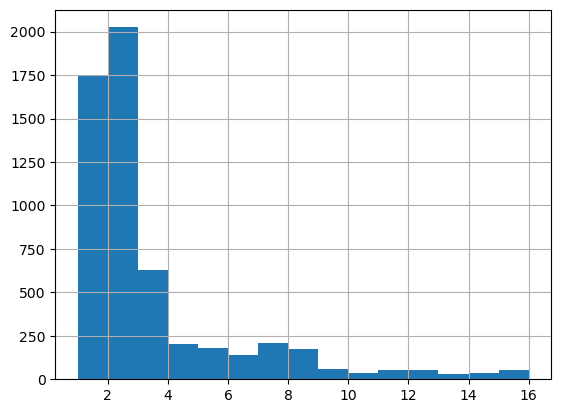

In [275]:


mean = churn_df_copy["OrderCount"].mean()    # average value is 3
churn_df_copy.fillna({"OrderCount": mean}, inplace=True)


churn_df_copy['OrderCount'] = churn_df_copy['OrderCount'].astype(int)
churn_df_copy["OrderCount"].hist(bins=15)

print(mean)

<hr/>

### <u>CouponUsed</u>
**CouponUsed** had 256 missing entries, which likely correspond to customers who did not use any coupons. These were filled with 0 to accurately reflect lack of activity.


In [276]:
churn_df_copy.fillna({"CouponUsed": 0}, inplace=True)


<hr/>

### <u>HoursSpendOnApp</u>


**HourSpendOnApp** was missing for 255 users. We interpreted these as users who did not engage with the app/website during the observation period and filled missing values with 0.


In [277]:
churn_df_copy.fillna({"HourSpendOnApp": 0}, inplace=True)


__We've now handled all missing values in our data__

<hr/>

In [278]:
churn_df_copy.isna().any()

CustomerID                        False
Churn                             False
Tenure(months)                    False
PreferredLoginDevice              False
CityTier                          False
WarehouseToHome                   False
PreferredPaymentMode              False
Gender                            False
HourSpendOnApp                    False
NumberOfDeviceRegistered          False
PreferredOrderCat                 False
SatisfactionScore                 False
MaritalStatus                     False
NumberOfAddress                   False
Complain                          False
OrderAmountHikeFromlastYear(%)    False
CouponUsed                        False
OrderCount                        False
DaySinceLastOrder                 False
CashbackAmount                    False
dtype: bool

In [279]:
churn_df_copy.head()

,CustomerID,Churn,Tenure(months),PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear(%),CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1,5,159.93
1,50002,1,9.0,Phone,1,8.0,Unified Payments Interface,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1,0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1,3,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1,3,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,0.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1,3,129.60


<hr/>

## <u>DEALING WITH OUTLIERS</u>


Outliers can:
+ Hinder model performance
+ Represent dirty and unusual data
+ Affect feature scaling and normalization



We'll make use of boxplots to see distribution

In [280]:
# Getting numerical columns

cat_cols = churn_df_copy.select_dtypes(include='object').columns.tolist()
num_cols = churn_df_copy.select_dtypes(include=["number"]).drop(columns=['CustomerID', 'Churn'], axis=1, errors='ignore').columns.tolist()

print(f"categorical columns: {cat_cols}")
print(f"numerical columns: {num_cols}")



import math
from plotly.subplots import make_subplots


num_cols_list = list(num_cols)  
n = len(num_cols_list)
cols_per_row = 4        # Adjustable  
rows = math.ceil(n / cols_per_row)

fig = make_subplots(rows=rows, cols=cols_per_row, subplot_titles=num_cols_list)

for i, col in enumerate(num_cols_list):
    row = (i // cols_per_row) + 1
    col_pos = (i % cols_per_row) + 1
    fig.add_trace(
        px.box(churn_df_copy, y=col).data[0],
        row=row, col=col_pos
    )

fig.update_layout(height=300 * rows, width=1000, showlegend=False)
fig.show()




categorical columns: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferredOrderCat', 'MaritalStatus']
numerical columns: ['Tenure(months)', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear(%)', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


__How we will be handling features with outliers__
- `Tenure(months)`: Meaning long-term customers, we will leave it as it is
- `WarehouseToHome`: Just one extreme value, we will cap it at the upper limit  *
- `HourSpendOnApp`: Outliers are not very extreme from the average,we have one user that does not use the app, we will keep them
- `NumberOfDeviceRegistered`: Minimum 1, maximum 6, we will leave it as it is
- `NumberOfAddress`: over 15 addresses seems very unrealistic, we will keep it at the upper IQR     *
- `OrderAmountHikeFromlastYear(%)`: Single outlier close to upper IQR, we can leave it
- `CouponUsed`: Many outliers, the data is skewed, we can cap values at 95th percentile to reduce skew       *
- `OrderCount`: We will handle this column data like the CouponUsed column, capping at the 95th percentile   *
- `DaySinceLastOrder`: Makes sense for dormant users, shows valuable information, we will keep this
- `CashbackAmount`: We will cap outliers in this column at 99th percentile                                   *

In [281]:
# Handling extreme outliers
# Columns to cap and their capping percentile
capping_info = {
    'OrderCount': 0.95,
    'CouponUsed': 0.95,
    'NumberOfAddress': 0.95,
    'CashbackAmount': 0.99,
    'WarehouseToHome': 0.95
}

# Code block to apply capping of values
for col, pct in capping_info.items():
    # Returns the given quantile (95th, 80th, 99th, etc.)
    cap_value = churn_df_copy[col].quantile(pct)
    # Caps any extreme value to the given quantile
    churn_df_copy[col] = churn_df_copy[col].clip(upper=cap_value)
    
    print(f"{col} capped at {pct*100}% percentile ({cap_value:.2f})")


OrderCount capped at 95.0% percentile (9.00)
CouponUsed capped at 95.0% percentile (6.00)
NumberOfAddress capped at 95.0% percentile (10.00)
CashbackAmount capped at 99.0% percentile (318.74)
WarehouseToHome capped at 95.0% percentile (32.00)


Boxplots revealed several features with extreme values. Instead of removing data points, we used a **winsorization** to reduce the influence of extreme values while preserving customer data.

These features were capped at the 95th or 99th percentile to preserve rarcases while stil reducing extreme values:

- `OrderCount`
- `CouponUsed`
- `NumberOfAddress`
- `CashbackAmount`
- `WarehouseToHome` (for one extreme distance)

Features with valid but rare high values (e.g. `Tenure`, `DaySinceLastOrder`, `HourSpendOnApp`) were not modified.


Boxplot after outliers have been removed

In [ ]:

fig = make_subplots(rows=rows, cols=cols_per_row, subplot_titles=num_cols_list)

for i, col in enumerate(num_cols_list):
    row = (i // cols_per_row) + 1
    col_pos = (i % cols_per_row) + 1
    fig.add_trace(
        px.box(churn_df_copy, y=col).data[0],
        row=row, col=col_pos
    )

fig.update_layout(height=300 * rows, width=1000, showlegend=False)
fig.show()


<hr/>